## Plotting Goals: Nice Maps
##### load modules:

In [1]:
from itertools import product

import numpy as np
import xarray as xr

import matplotlib.gridspec as gridspec
import pop_tools
import xpersist as xp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.colors as colors
from matplotlib import style
import cartopy.feature as cfeature

import util

### Import Epoch Data

In [2]:
ds_djf_epoch = xr.open_zarr('data/cesm-le-fields-djf-epoch-mean-6090.zarr')

### Run a quick set of plots to make sure everything is there:

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


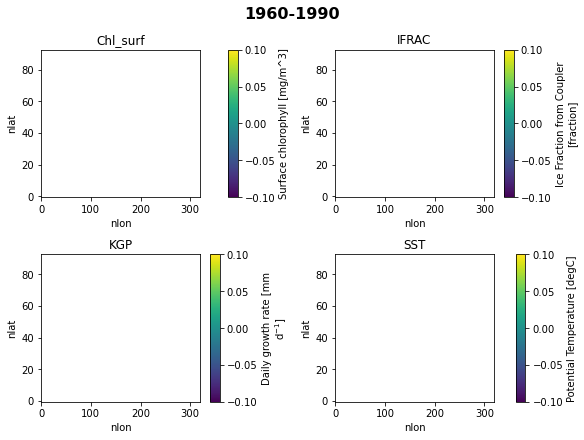

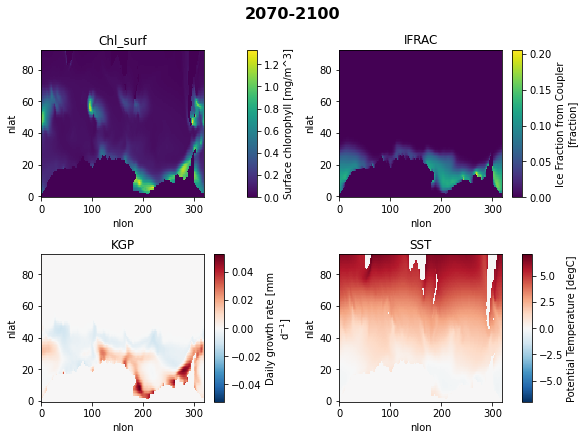

In [3]:
for epoch in ds_djf_epoch.epoch.values:

    nvar = len(ds_djf_epoch.data_vars)
    ncol = int(np.sqrt(nvar))
    nrow = int(nvar/ncol) + min(1, nvar%ncol)

    fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow),
                           constrained_layout=True)

    for i, v in enumerate(ds_djf_epoch.data_vars):
        plt.axes(ax.ravel()[i])

        with xr.set_options(keep_attrs=True):             
            var = ds_djf_epoch[v].sel(epoch=epoch).mean('member_id')
        if 'length' in var.dims:
            var = var.sel(length=40.)            
        var.plot()
        plt.title(v);
    plt.suptitle(epoch, fontsize=16, fontweight='bold');

## Make Polar Plots:
1. fix grid for plotting

In [39]:
dsp = util.pop_add_cyclic(ds_djf_epoch)

NotImplementedError: Item assignment with <class 'tuple'> not supported

## This is the only way I've been able to plot things... 
but there is a gaping hole in the center and I've not consistently been able to fix it

In [104]:
ds_djf_epoch = xr.open_zarr('data/cesm-le-fields-djf-epoch-mean-6090.zarr')
## Create Datafields to plot
kgp_mean = ds_djf_epoch['KGP'].where(ds_djf_epoch.KMT > 0).mean('member_id')
sst_mean = ds_djf_epoch['SST'].where(ds_djf_epoch.KMT > 0).mean('member_id')
chl_mean = ds_djf_epoch['Chl_surf'].where(ds_djf_epoch.KMT > 0).mean('member_id')
ice_mean = ds_djf_epoch['IFRAC'].where(ds_djf_epoch.KMT > 0).mean('member_id')

kgp_early = kgp_mean.sel(length='40').sel(epoch='1985-2005')
kgp_late = kgp_mean.sel(length='40').sel(epoch='2070-2100')

sst_early = sst_mean.sel(epoch='1985-2005')
sst_late = sst_mean.sel(epoch='2070-2100')
chl_early = chl_mean.sel(epoch='1985-2005')
chl_late = chl_mean.sel(epoch='2070-2100')
ice_early = ice_mean.sel(epoch='1985-2005')
ice_late = ice_mean.sel(epoch='2070-2100')

# Lat Lon Checks
lon = ds_djf_epoch.TLONG.values
lat = ds_djf_epoch.TLAT.values

In [109]:
#make a color bar similar to previous studies
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
'''
arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('nipy_spectral')
new_cmap = truncate_colormap(cmap, 0.1, 0.9)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show() '''

"\narr = np.linspace(0, 50, 100).reshape((10, 10))\nfig, ax = plt.subplots(ncols=2)\n\ncmap = plt.get_cmap('nipy_spectral')\nnew_cmap = truncate_colormap(cmap, 0.1, 0.9)\nax[0].imshow(arr, interpolation='nearest', cmap=cmap)\nax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)\nplt.show() "

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


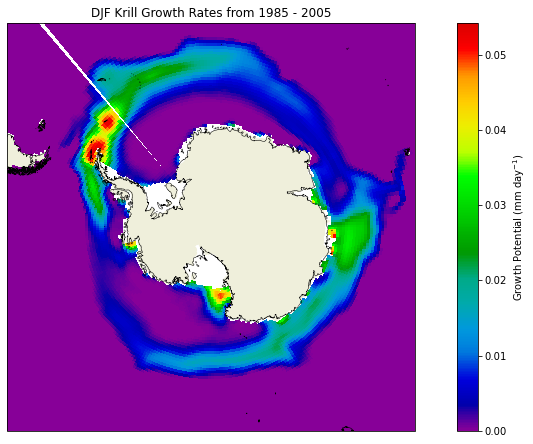

In [87]:
fig = plt.figure(figsize=(15,7.5))
#fig.suptitle('Seasonal DJF Krill Production from 1985 - 2005')#, fontsize=)
#cmap = 'nipy_spectral'
cmap = new_cmap
#----------Chl
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('DJF Krill Growth Rates from 1985 - 2005')
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.add_feature(cfeature.LAND)

pc=ax.pcolormesh(lon, lat, kgp_early, cmap=cmap,
                 vmin = 0,
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,label='Growth Potential (mm day$^{-1}$)')
#fig.savefig('Seasonal DJF Climatologies from 30 year epochs CESM-LE: 1985-2005', bbox_inches='tight') #,format='pdf');


/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


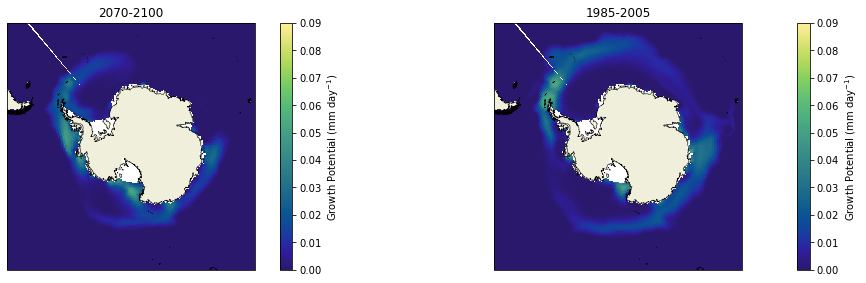

In [143]:
fig = plt.figure(figsize=(20,10))

#cmap=new_cmap
cmap= cmocean.cm.haline
#----------1985
ax2 = fig.add_subplot(211, projection=ccrs.SouthPolarStereo())
ax2.set_title('1985-2005')
ax2.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax2.coastlines('10m',linewidth=0.5)
ax2.add_feature(cfeature.LAND)

pc=ax2.pcolormesh(lon, lat, kgp_early,
                 cmap=cmap, vmin=0,vmax = 0.09,
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax2,label='Growth Potential (mm day$^{-1}$)')

#----------2070
ax3 = fig.add_subplot(221, projection=ccrs.SouthPolarStereo())
ax3.set_title('2070-2100')
ax3.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax3.coastlines('10m',linewidth=0.5)
ax3.add_feature(cfeature.LAND)

pc=ax3.pcolormesh(lon, lat, kgp_late,
                 cmap=cmap, vmin=0, vmax = 0.09,
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax3,label='Growth Potential (mm day$^{-1}$)')

#fig.savefig('Seasonal DJF Climatologies from 30 year epochs CESM-LE: 1985-2005', bbox_inches='tight') #,format='pdf');


In [118]:
#Plot SST
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


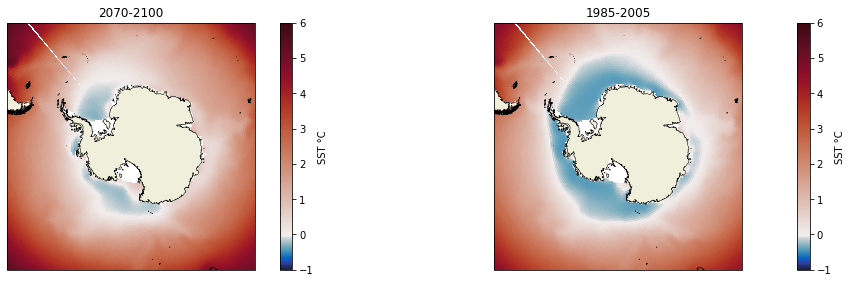

In [142]:
#same for for SST
fig = plt.figure(figsize=(20,10))

cmap=cmocean.cm.balance

#----------1985
ax2 = fig.add_subplot(211, projection=ccrs.SouthPolarStereo())
ax2.set_title('1985-2005')
ax2.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax2.coastlines('10m',linewidth=0.5)
ax2.add_feature(cfeature.LAND)

pc=ax2.pcolormesh(lon, lat, sst_early, norm=MidpointNormalize(midpoint=0.),
                 cmap=cmap, vmin = -1,vmax = 6,
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax2,label='SST °C')

#----------2070
ax3 = fig.add_subplot(221, projection=ccrs.SouthPolarStereo())
ax3.set_title('2070-2100')
ax3.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax3.coastlines('10m',linewidth=0.5)
ax3.add_feature(cfeature.LAND)

pc=ax3.pcolormesh(lon, lat, sst_late,
                 cmap=cmap, vmin = -1,vmax = 6, norm=MidpointNormalize(midpoint=0.),
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax3,label='SST °C')

#fig.savefig('Seasonal DJF Climatologies from 30 year epochs CESM-LE: 1985-2005', bbox_inches='tight') #,format='pdf');


/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


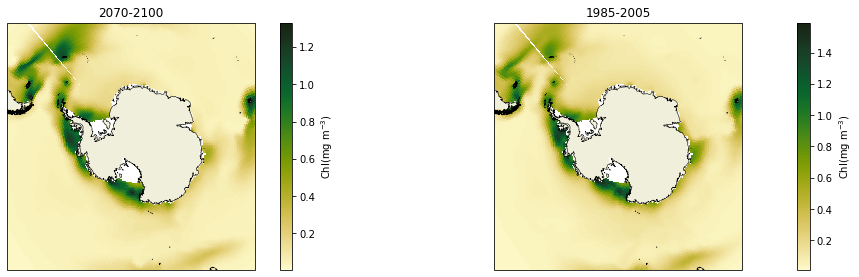

In [141]:
#same for for CHL
fig = plt.figure(figsize=(20,10))

#cmap=cmocean.cm.speed
cmap=cmocean.cm.delta

#----------1985
ax2 = fig.add_subplot(211, projection=ccrs.SouthPolarStereo())
ax2.set_title('1985-2005')
ax2.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax2.coastlines('10m',linewidth=0.5)
ax2.add_feature(cfeature.LAND)

pc=ax2.pcolormesh(lon, lat, chl_early, norm=MidpointNormalize(midpoint=0.),
                 cmap=cmap, #vmin = -1,vmax = 6,
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax2,label='Chl(mg m$^{-3}$)')

#----------2070
ax3 = fig.add_subplot(221, projection=ccrs.SouthPolarStereo())
ax3.set_title('2070-2100')
ax3.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax3.coastlines('10m',linewidth=0.5)
ax3.add_feature(cfeature.LAND)

pc=ax3.pcolormesh(lon, lat, chl_late,
                 cmap=cmap, norm=MidpointNormalize(midpoint=0.),
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax3,label='Chl(mg m$^{-3}$)')

#fig.savefig('Seasonal DJF Climatologies from 30 year epochs CESM-LE: 1985-2005', bbox_inches='tight') #,format='pdf');
